___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [167]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import clean_columns

sns.set_style("white")

#### Load Dataset

In [168]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")

#### Explore Data

You can rename columns to more usable, if you need.

In [169]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [171]:
# Rename columns

df.columns = ['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)']

In [172]:
df.head()

,gender,age,annual_income(k$),spending_score(1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [173]:
df.isnull().sum()

gender                   0
age                      0
annual_income(k$)        0
spending_score(1-100)    0
dtype: int64

In [174]:
df.duplicated().sum()

0

In [175]:
df.describe()

,age,annual_income(k$),spending_score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


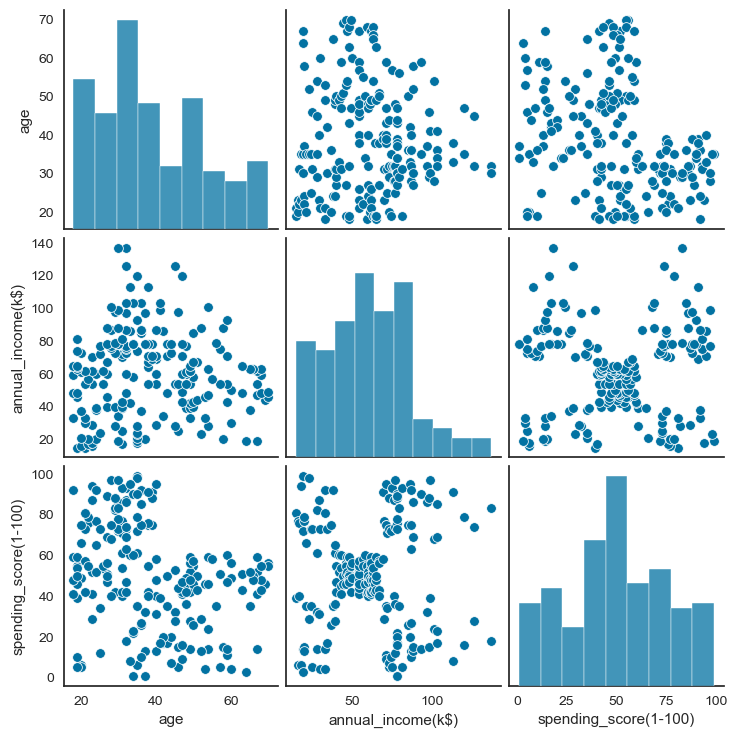

In [176]:
sns.pairplot(df)
plt.show()

In [177]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

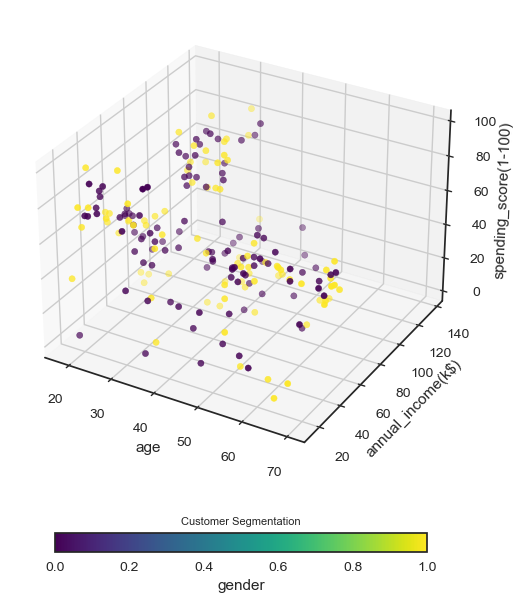

In [178]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['gender'].astype("category").cat.codes, cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

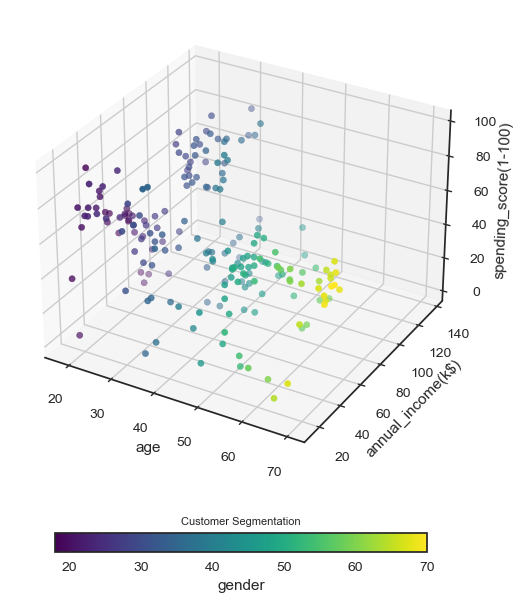

In [179]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

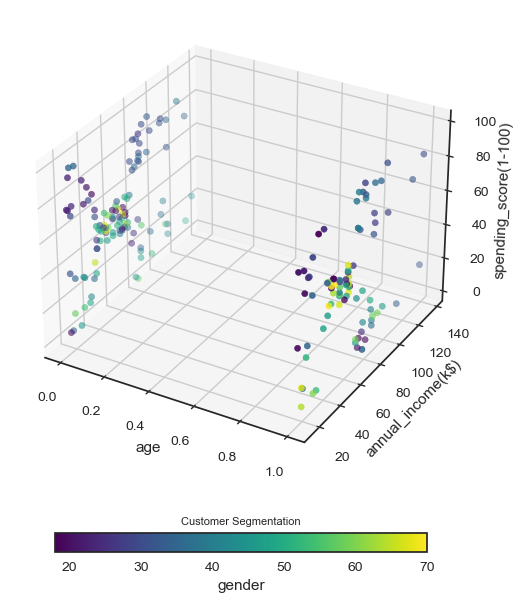

In [180]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

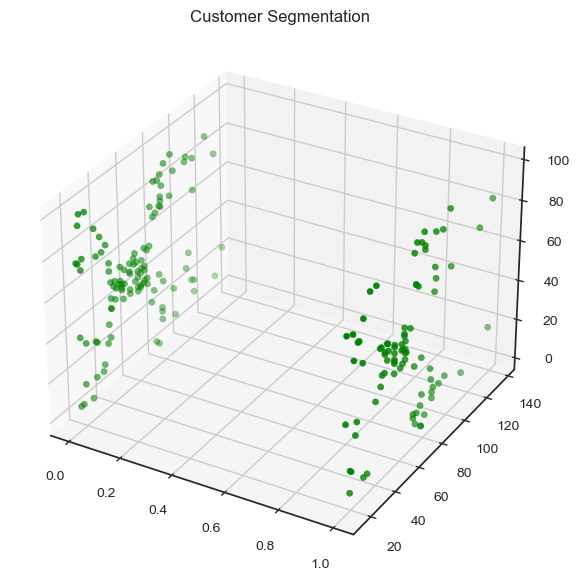

In [181]:
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'], color = "green")
plt.title("Customer Segmentation")
 
# show plot
plt.show()

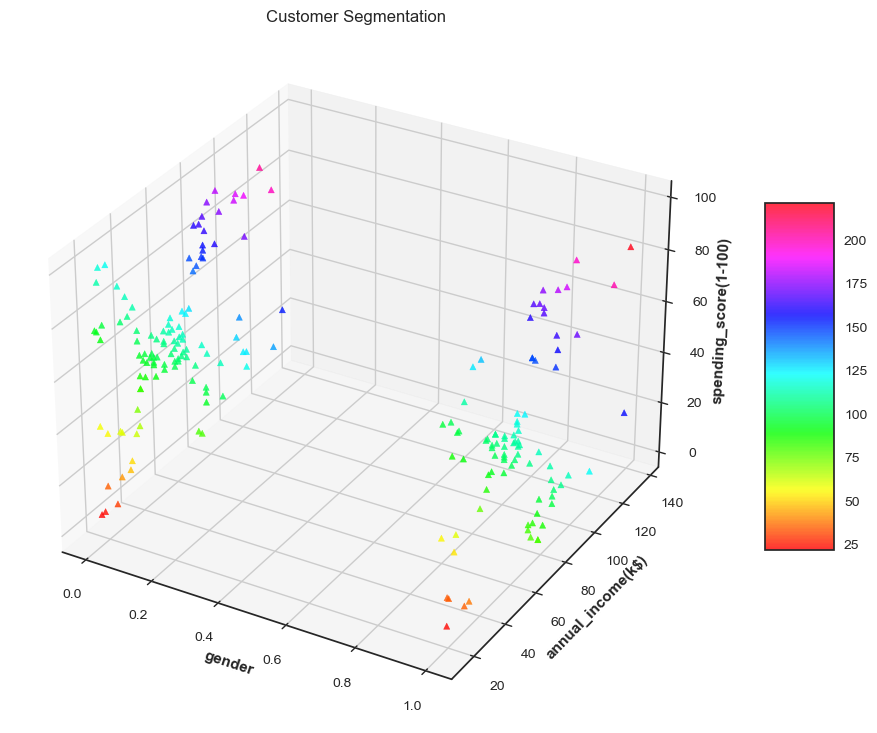

In [182]:
# Import libraries
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'],
                    alpha = 0.8,
                    c = (df['gender'].astype("category").cat.codes + df['annual_income(k$)'] + df['spending_score(1-100)']),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Customer Segmentation")
ax.set_xlabel('gender', fontweight ='bold')
ax.set_ylabel('annual_income(k$)', fontweight ='bold')
ax.set_zlabel('spending_score(1-100)', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

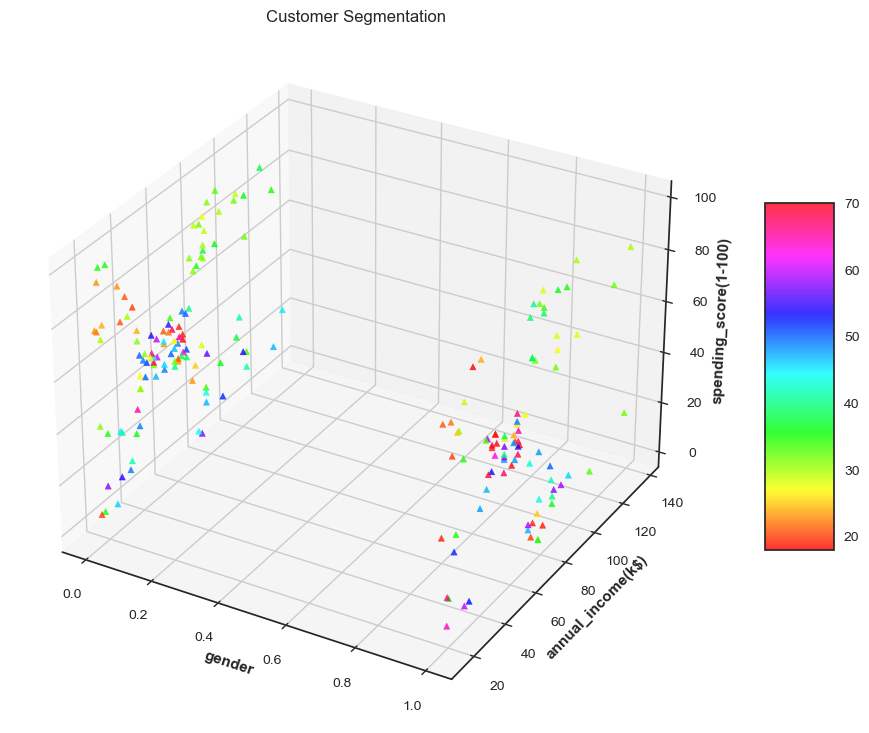

In [183]:
# Import libraries
from mpl_toolkits import mplot3d

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'],
                    alpha = 0.8,
                    c = (df['age']),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Customer Segmentation")
ax.set_xlabel('gender', fontweight ='bold')
ax.set_ylabel('annual_income(k$)', fontweight ='bold')
ax.set_zlabel('spending_score(1-100)', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

In [184]:
df.corr()

,age,annual_income(k$),spending_score(1-100)
age,1.000000,-0.012398,-0.327227
annual_income(k$),-0.012398,1.000000,0.009903
spending_score(1-100),-0.327227,0.009903,1.000000


---
---

In [185]:
df.groupby("gender").describe().T

gender                           Female        Male
age                   count  112.000000   88.000000
                      mean    38.098214   39.806818
                      std     12.644095   15.514812
                      min     18.000000   18.000000
                      25%     29.000000   27.750000
                      50%     35.000000   37.000000
                      75%     47.500000   50.500000
                      max     68.000000   70.000000
annual_income(k$)     count  112.000000   88.000000
                      mean    59.250000   62.227273
                      std     26.011952   26.638373
                      min     16.000000   15.000000
                      25%     39.750000   45.500000
                      50%     60.000000   62.500000
                      75%     77.250000   78.000000
                      max    126.000000  137.000000
spending_score(1-100) count  112.000000   88.000000
                      mean    51.526786   48.511364
                      std     24.114950   27.896770
                      min      5.000000    1.000000
                      25%     35.000000   24.500000
                      50%     50.000000   50.000000
                      75%     73.000000   70.000000
                      max     99.000000   97.000000

In [186]:
df.groupby("gender").corr()

age  annual_income(k$)  \
gender                                                      
Female age                    1.000000           0.059912   
       annual_income(k$)      0.059912           1.000000   
       spending_score(1-100) -0.375439           0.047542   
Male   age                    1.000000          -0.092978   
       annual_income(k$)     -0.092978           1.000000   
       spending_score(1-100) -0.279628          -0.023684   

                              spending_score(1-100)  
gender                                               
Female age                                -0.375439  
       annual_income(k$)                   0.047542  
       spending_score(1-100)               1.000000  
Male   age                                -0.279628  
       annual_income(k$)                  -0.023684  
       spending_score(1-100)               1.000000

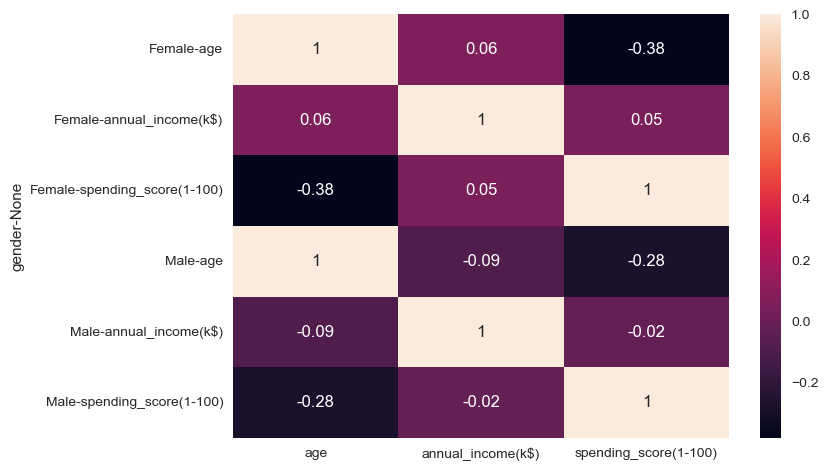

In [187]:
sns.heatmap(df.groupby("gender").corr().round(2), annot=True)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## KMeans Clustering

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [188]:
df["gender"] =df.gender.map({"Male":1, "Female":0})

In [189]:
df1 = df.copy()

In [190]:
# Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [191]:
X =df_scaled[:, [1,3]]
X

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

#### *ii. Determine optimal number of clusters*

In [192]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit_predict(X)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [193]:
# with pipeline

In [194]:
# from sklearn.pipeline import Pipeline

# operations = [("scaler", scaler),("kmeans_model", KMeans(n_clusters=5, random_state=42))]
# pipe_model = Pipeline(operations)

In [195]:
# X =df.iloc[:, [1,3]]
# X

In [196]:
# pipe_model.fit_predict(X)

### Hopkins method

In [197]:
from pyclustertend import hopkins

In [198]:
X.shape

(200, 2)

In [199]:
hopkins(X, X.shape[0])

0.28548101346751154

In [200]:
# Elbow method using age and spending score variables

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    inertia.append(kmeans.inertia_)

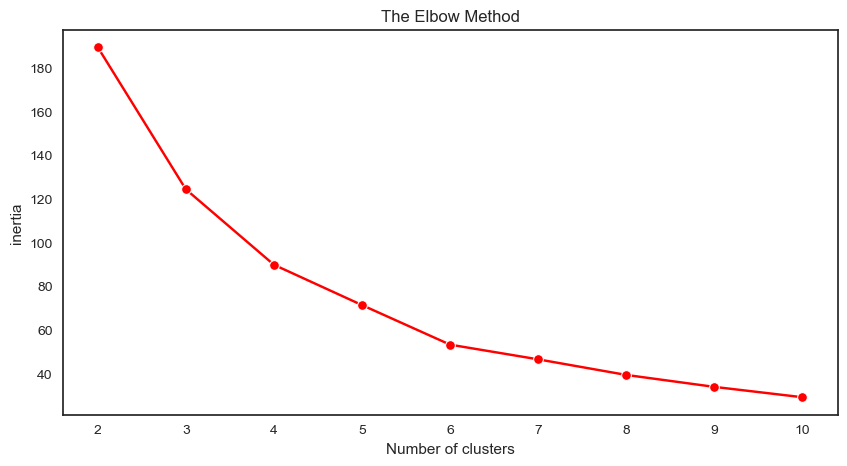

In [201]:
# Elbow method using age and spending score variables

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [202]:
K = range(2,11)
pd.Series(inertia, index = K).diff(-1)

2     65.061204
3     34.561069
4     18.469651
5     18.121828
6      6.727452
7      7.140412
8      5.469426
9      4.742344
10          NaN
dtype: float64

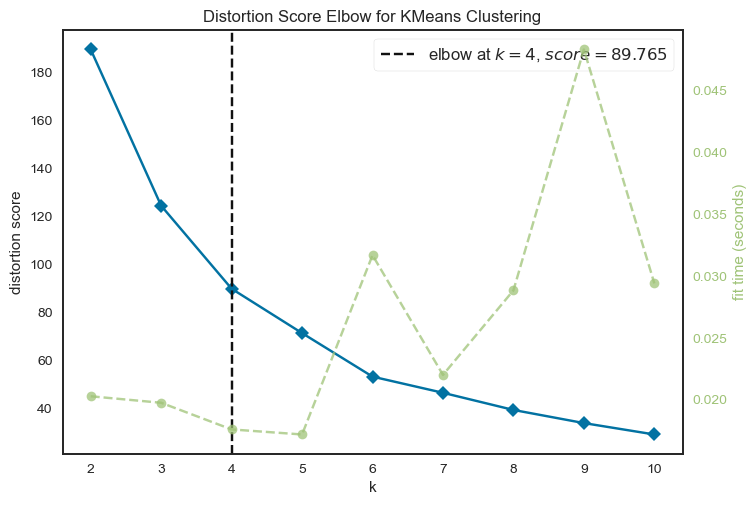

In [203]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

### Why silhouette_score is negative?

#### *iii. Apply K Means*

In [208]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2])

In [209]:
silhouette_score(X, kmeans.labels_)  # cluster sayısı 4 için

0.4383860846564479

In [210]:
# silhouette_scores for different k values

for k in K:
    # intialise kmeans
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564479
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.4138741299279621
For n_clusters=9, the silhouette score is 0.4230225675097127
For n_clusters=10, the silhouette score is 0.44189616933636117


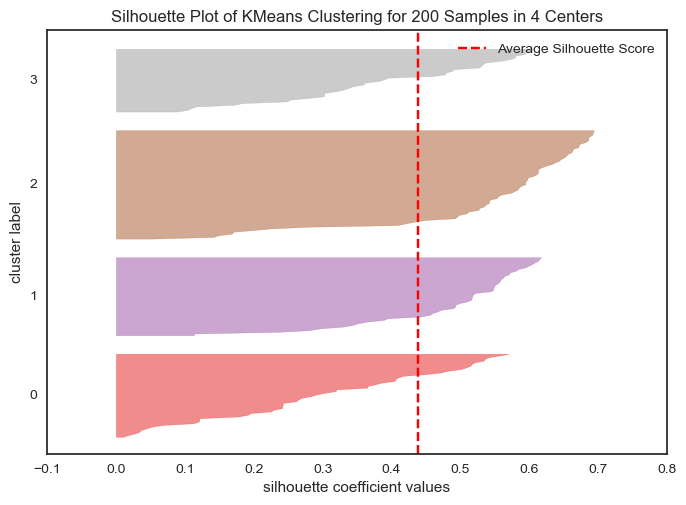

In [211]:
# cluster 4 için

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

In [212]:
kmeans.cluster_centers_

array([[-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894]])

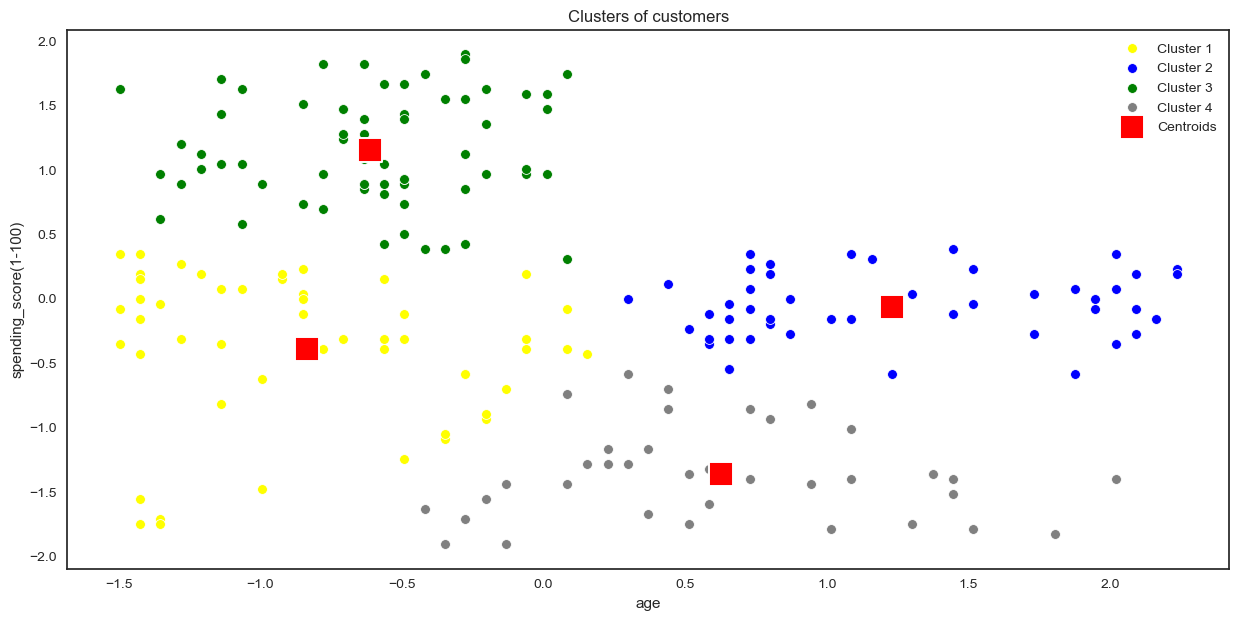

In [213]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
# sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('age')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [214]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

In [215]:
X =df_scaled[:, [2,3]]
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### *ii. Determine optimal number of clusters*

In [216]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit_predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### Hopkins method

In [217]:
X.shape

(200, 2)

In [218]:
hopkins(X, X.shape[0])

0.3183050279943484

In [219]:
# Elbow method using age and spending score variables

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    inertia.append(kmeans.inertia_)

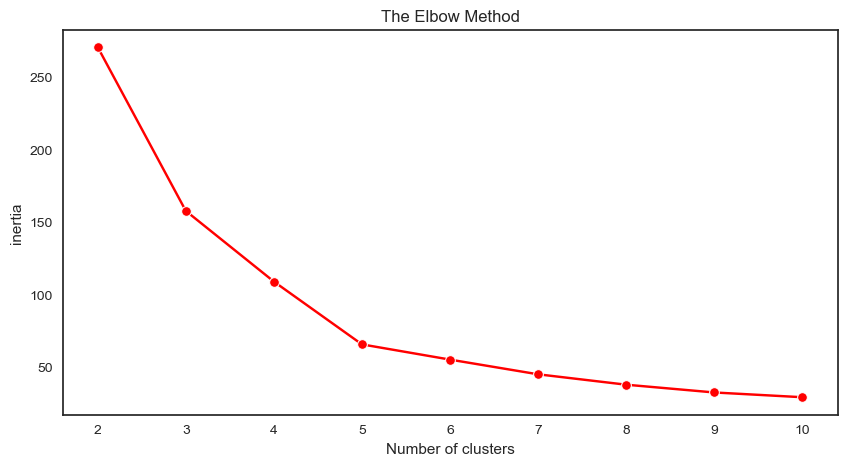

In [220]:
# Elbow method using age and spending score variables

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

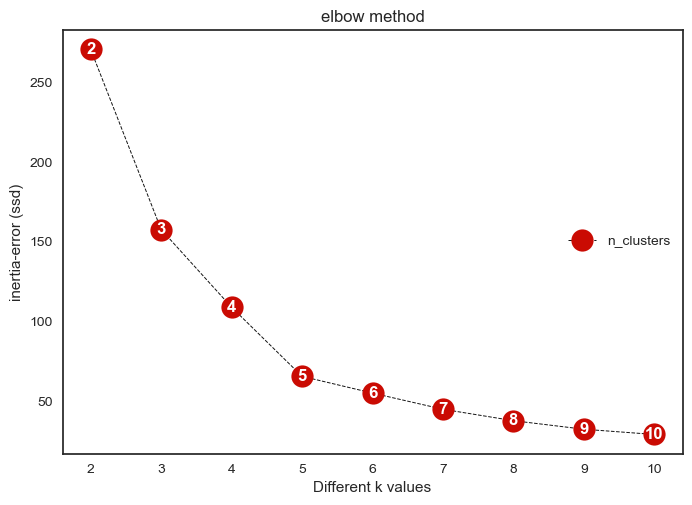

In [223]:
plt.plot(
    K, inertia, 
    color='k', ls='--', lw=0.7,
    marker='o', mfc='r', ms=16,
    label='n_clusters'
)
for x, y in zip(K, inertia):
    plt.annotate(x, (x, y), size=12, 
        weight='heavy', color='w',
        ha='center', va='center'
    ) 
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 
plt.legend(loc='center right')
plt.show();

In [224]:
pd.Series(inertia, index=K).diff(-1)

2     113.000258
3      48.782692
4      43.352908
5      10.511060
6      10.146163
7       7.174782
8       5.361150
9       3.284685
10           NaN
dtype: float64

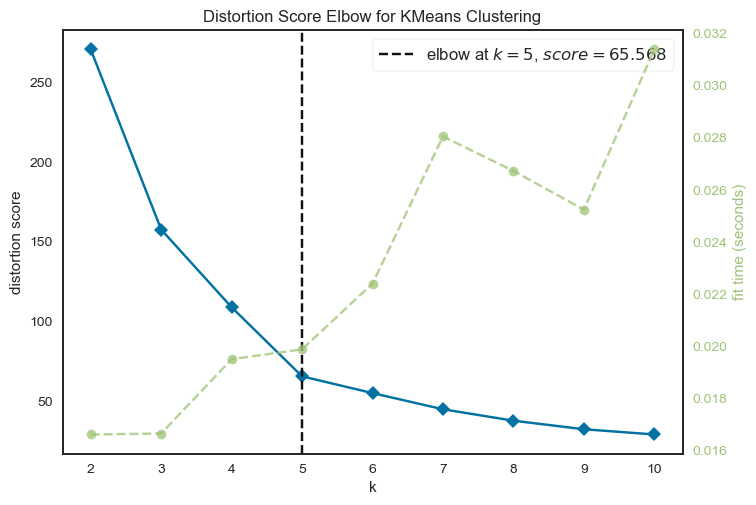

In [225]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

#### *iii. Apply K Means*

In [226]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [227]:
silhouette_score(X, kmeans.labels_)  # cluster sayısı 5 için

0.5546571631111091

In [228]:
# silhouette_scores for different k values

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45584381231187066
For n_clusters=9, the silhouette score is 0.45532159949822104
For n_clusters=10, the silhouette score is 0.4476280825932578


#### *iv. Visualizing and Labeling All the Clusters*

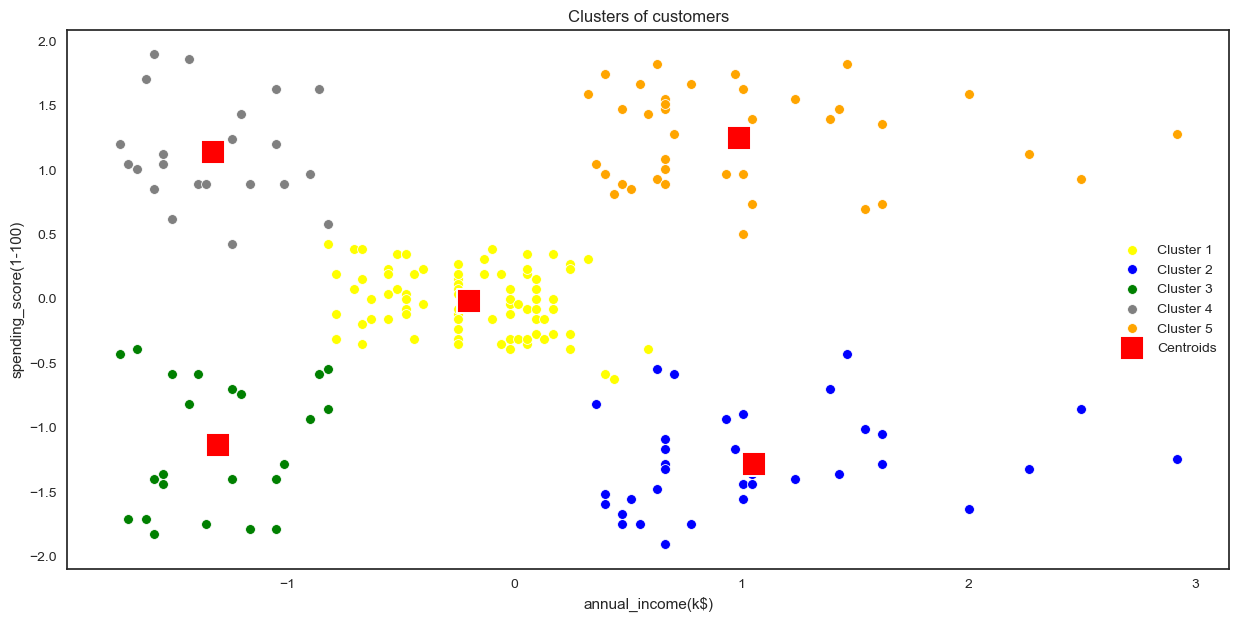

In [229]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('annual_income(k$)')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()

 2 : low_income_low_spent
 
 3 : low_income_high_spent
 
 0 : medium_income_medium_spent
 
 1 : high_income_low_spent
 
 4 : high_income_high_spent

In [230]:
df["labels"] = kmeans.labels_

In [231]:
df

,gender,age,annual_income(k$),spending_score(1-100),labels
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,3
3,0,20,16,6,2
4,0,23,16,77,3
5,0,31,17,40,2
...,...,...,...,...,...
196,0,35,120,79,4
197,0,45,126,28,1
198,1,32,126,74,4


In [232]:
df["labels"] = df.labels.map({0:"medium_income_medium_spent",
                          1:"high_income_low_spent",
                          2:"low_income_low_spent",
                          3:"low_income_high_spent",
                          4:"high_income_high_spent"})
df

,gender,age,annual_income(k$),spending_score(1-100),labels
CustomerID,,,,,
1,1,19,15,39,low_income_low_spent
2,1,21,15,81,low_income_high_spent
3,0,20,16,6,low_income_low_spent
4,0,23,16,77,low_income_high_spent
5,0,31,17,40,low_income_low_spent
...,...,...,...,...,...
196,0,35,120,79,high_income_high_spent
197,0,45,126,28,high_income_low_spent
198,1,32,126,74,high_income_high_spent


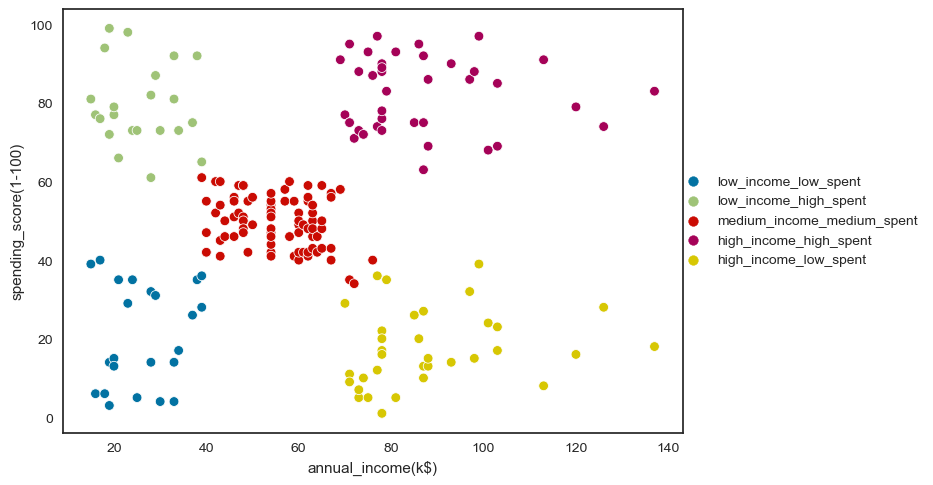

In [233]:
sns.scatterplot(data= df, x="annual_income(k$)", y="spending_score(1-100)", hue="labels")
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
plt.show()

In [234]:
clus_pred = df.groupby("labels").mean().T
clus_pred

labels,high_income_high_spent,high_income_low_spent,low_income_high_spent,low_income_low_spent,medium_income_medium_spent
gender,0.461538,0.542857,0.409091,0.391304,0.407407
age,32.692308,41.114286,25.272727,45.217391,42.716049
annual_income(k$),86.538462,88.200000,25.727273,26.304348,55.296296
spending_score(1-100),82.128205,17.114286,79.363636,20.913043,49.518519


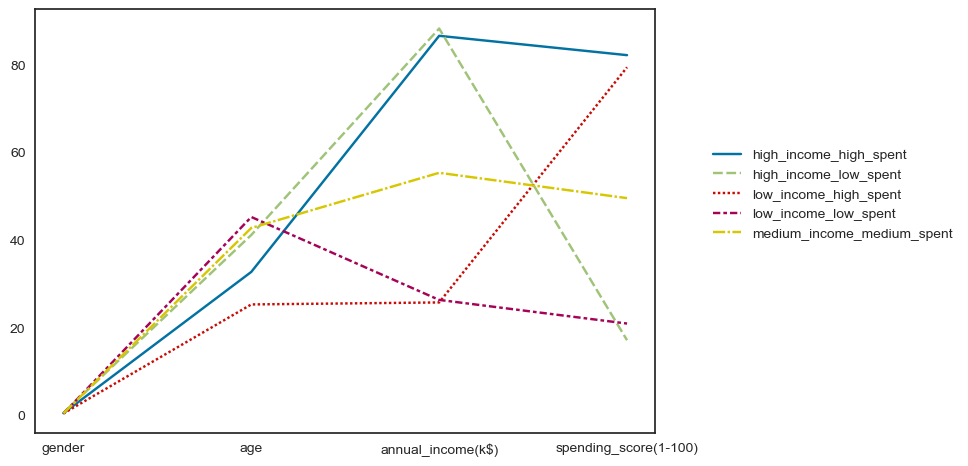

In [235]:
sns.lineplot(data = clus_pred)
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.show()

## Hierarchical Clustering (Agglomerative)

### Determine optimal number of clusters using Dendogram*

#### Clustering based on Age and Spending Score- x1

In [236]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [237]:
X1 =df_scaled[:, [1,3]]
X1

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

In [238]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete") 
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

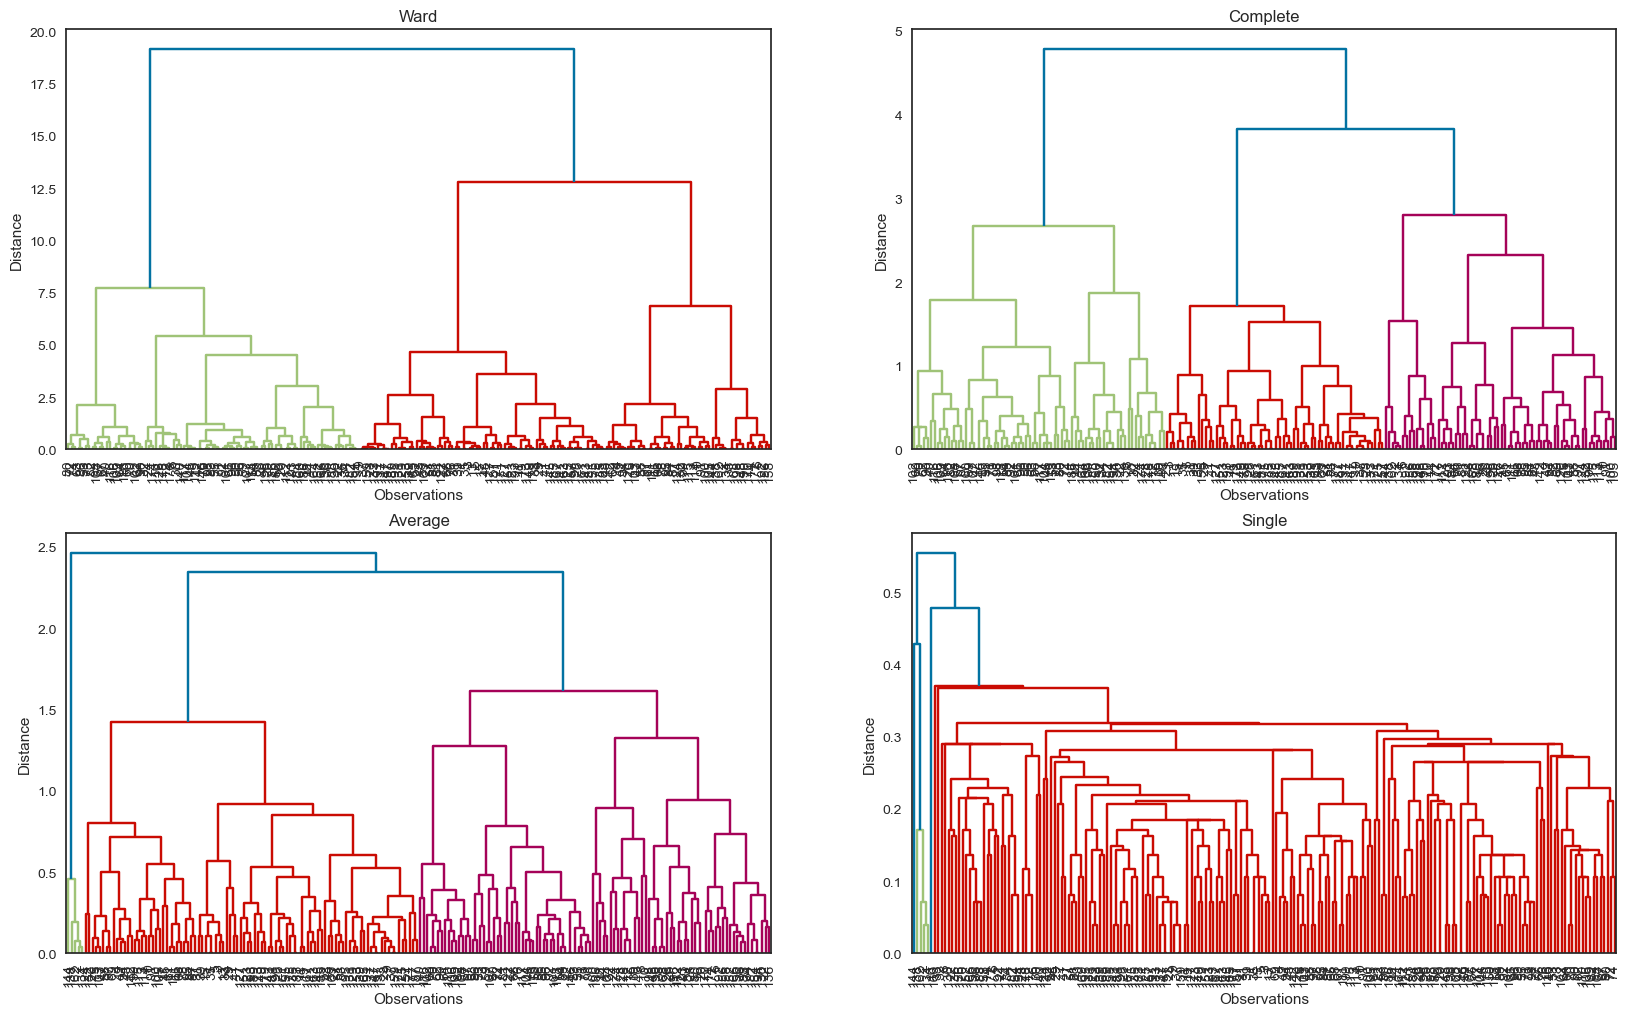

In [239]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")  
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10)
plt.show()

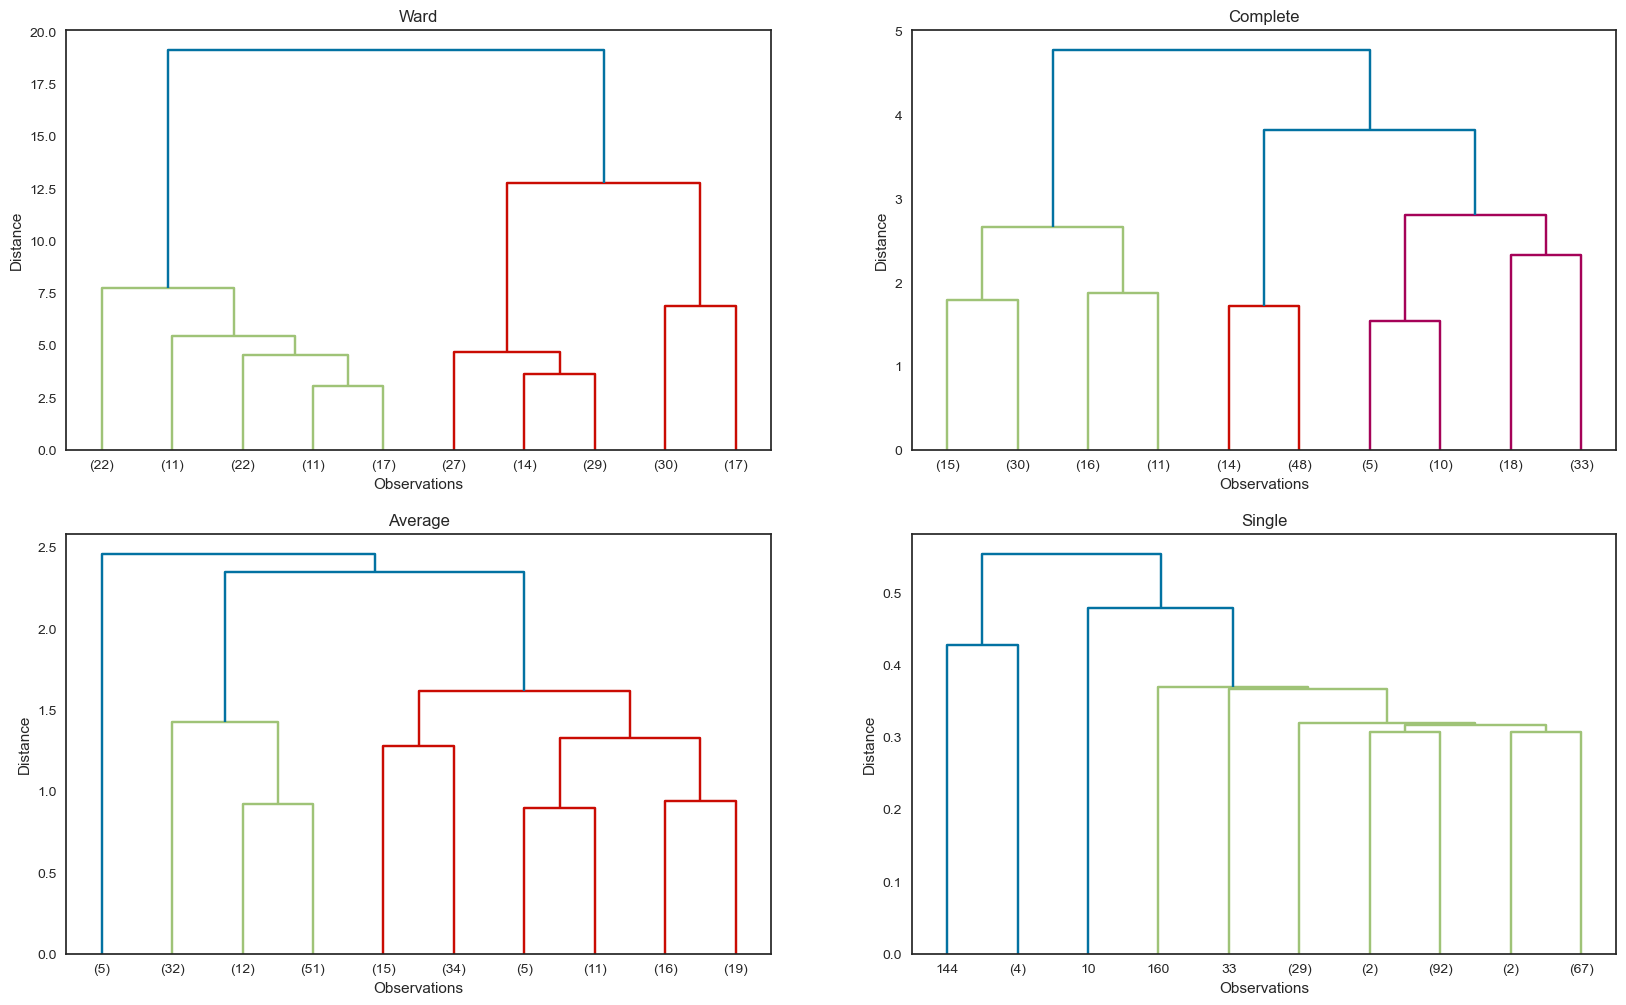

In [148]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10) # truncate_mode='lastp', p=10 (10 küme gösterir)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10)
plt.show()

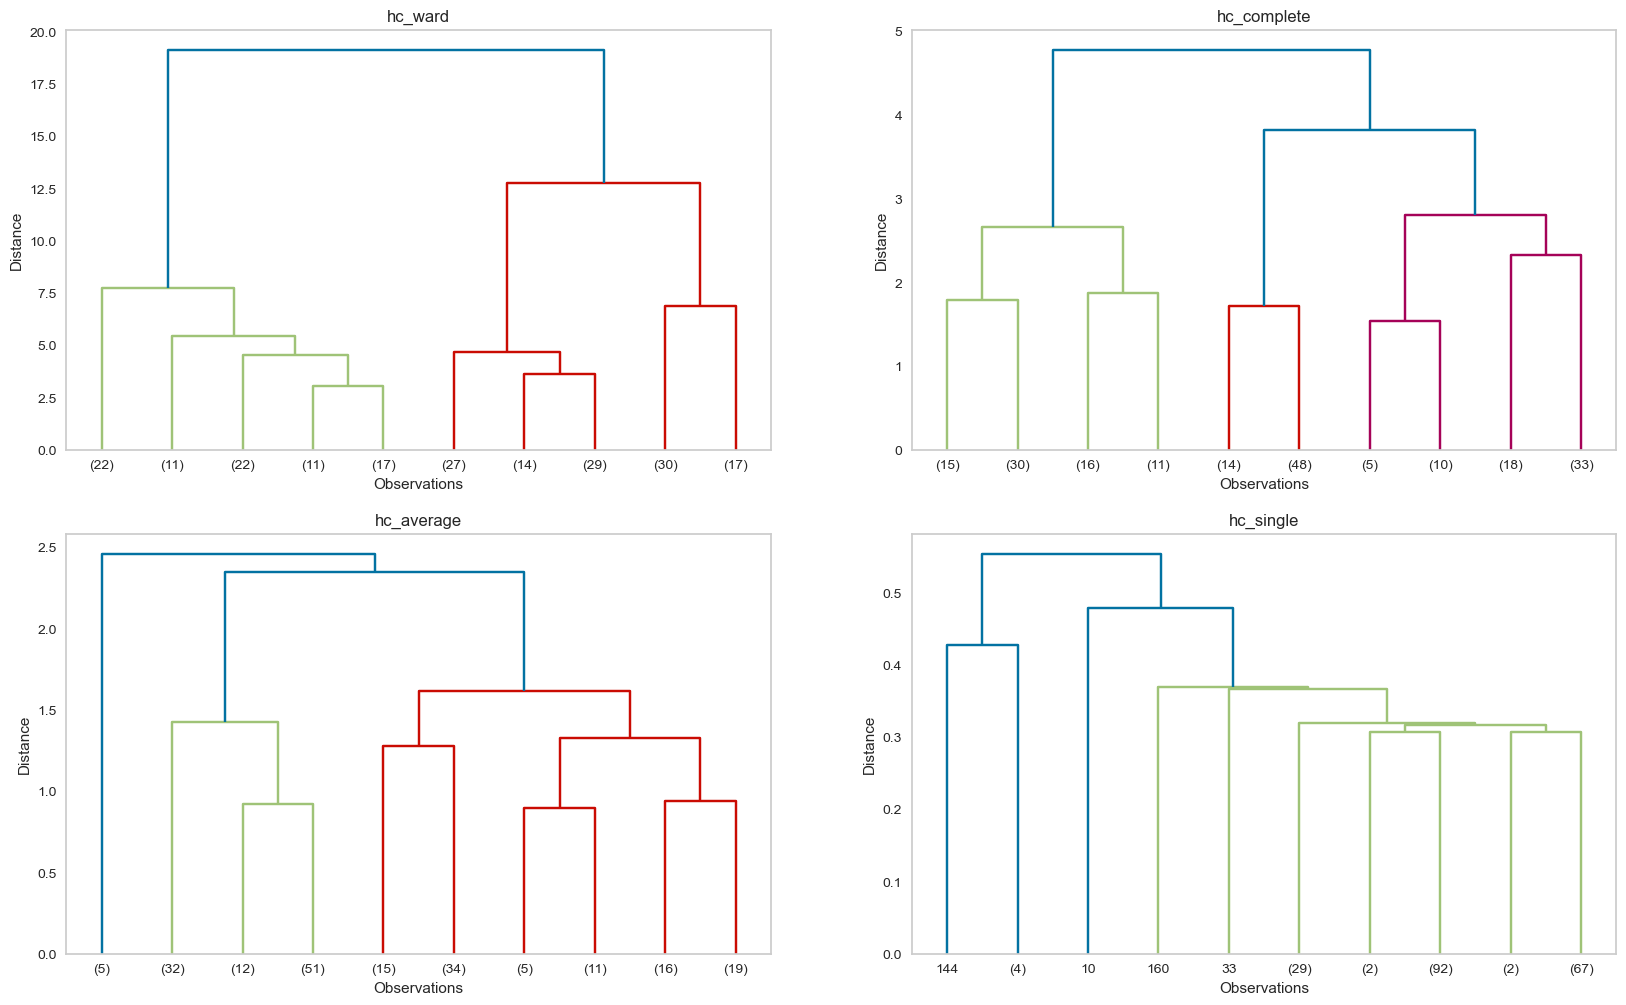

In [254]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    # truncate_mode='lastp', p=10(10 küme gösterir)
    dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)

#### Clustering based on Annual Income and Spending Score- x2

In [255]:
X2 =df_scaled[:, [2,3]]
X2

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [256]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete") 
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

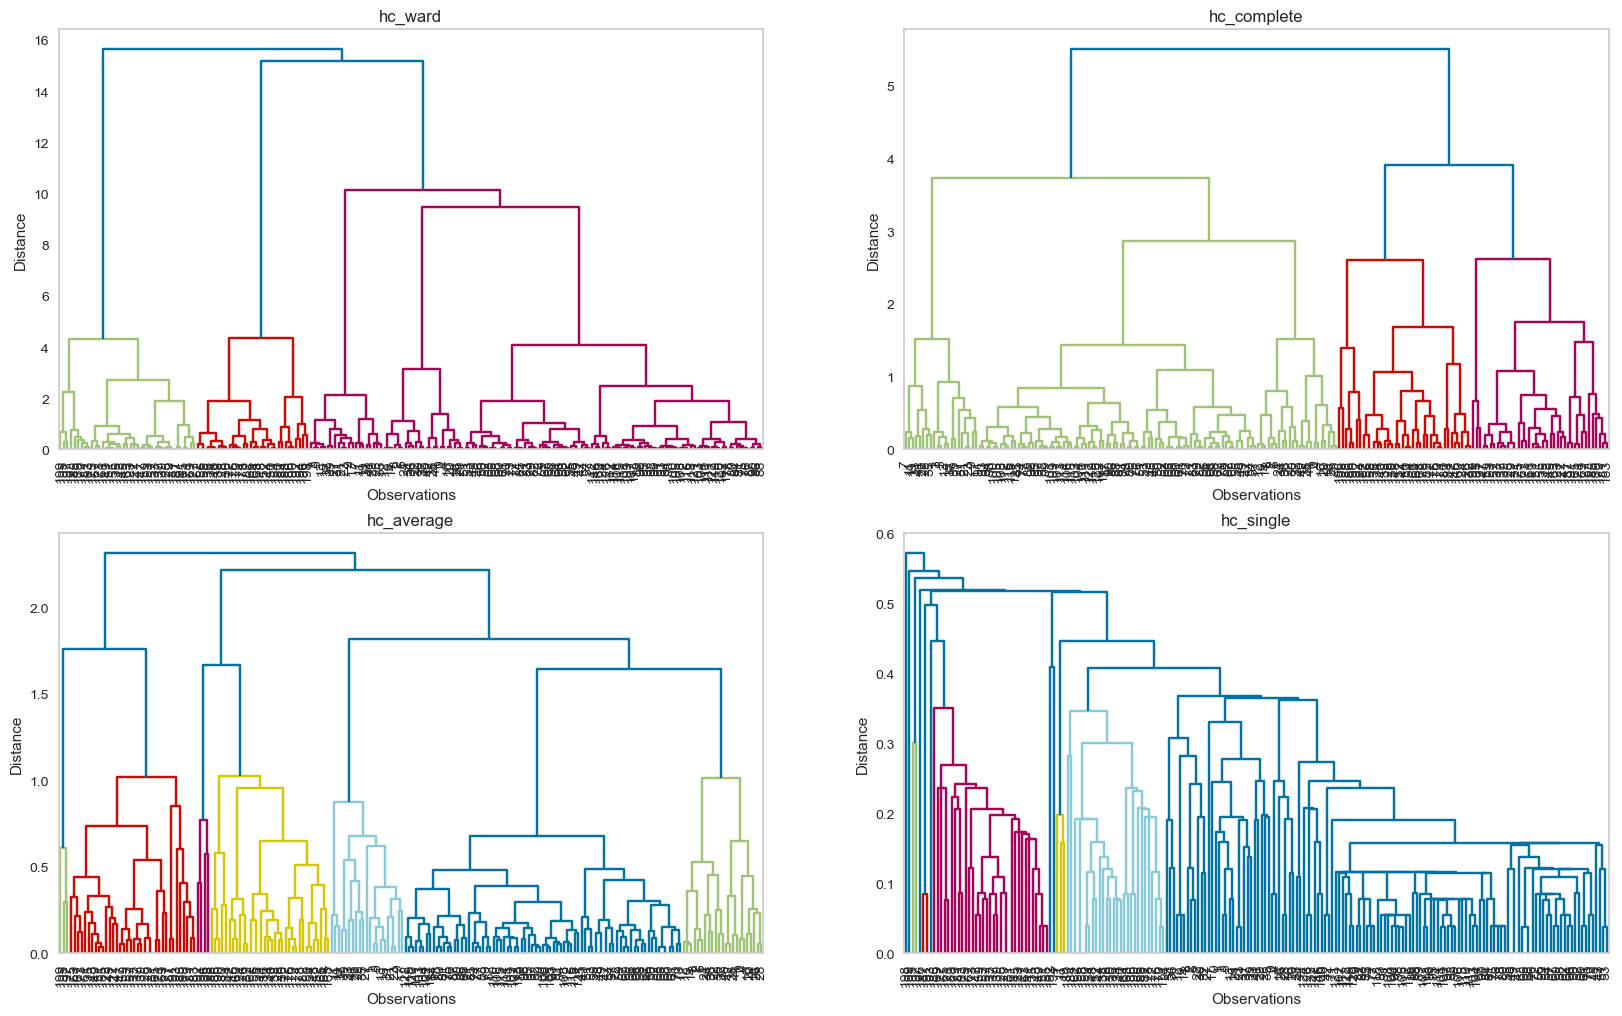

In [260]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10)

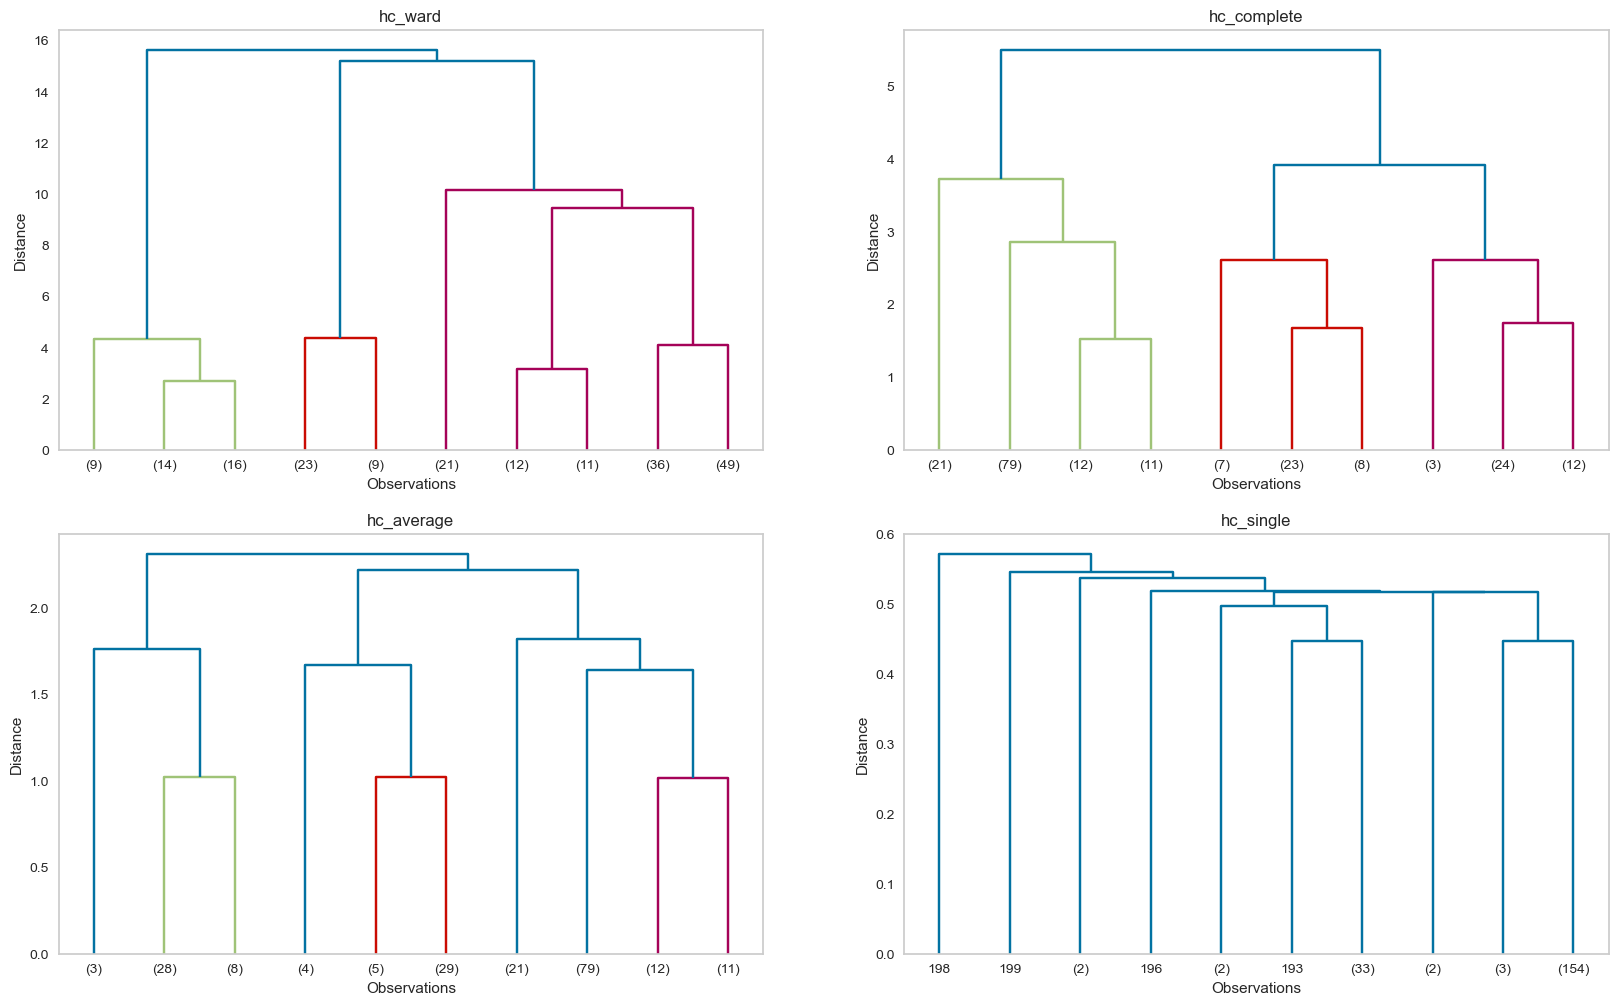

In [259]:
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    # truncate_mode='lastp', p=10(10 küme gösterir)
    dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)

### Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [261]:
# built model

from sklearn.cluster import AgglomerativeClustering

In [262]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268829986
Silhouette Score for 3 clusters: 0.4166414852049989
Silhouette Score for 4 clusters: 0.38927004893647266
Silhouette Score for 5 clusters: 0.3764554127969014
Silhouette Score for 6 clusters: 0.3990690566558255
Silhouette Score for 7 clusters: 0.358604678369238
Silhouette Score for 8 clusters: 0.361081283331325
Silhouette Score for 9 clusters: 0.3659083749836485


In [242]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2], dtype=int64)

#### Annual Income and Spending Score- x2

In [265]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475769
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.4376899775815414


In [267]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [243]:
df["label1"] = model1.labels_

In [244]:
df

,gender,age,annual_income(k$),spending_score(1-100),labels,label1
CustomerID,,,,,,
1,1,19,15,39,low_income_low_spent,1
2,1,21,15,81,low_income_high_spent,2
3,0,20,16,6,low_income_low_spent,1
4,0,23,16,77,low_income_high_spent,2
5,0,31,17,40,low_income_low_spent,1
...,...,...,...,...,...,...
196,0,35,120,79,high_income_high_spent,2
197,0,45,126,28,high_income_low_spent,0
198,1,32,126,74,high_income_high_spent,2


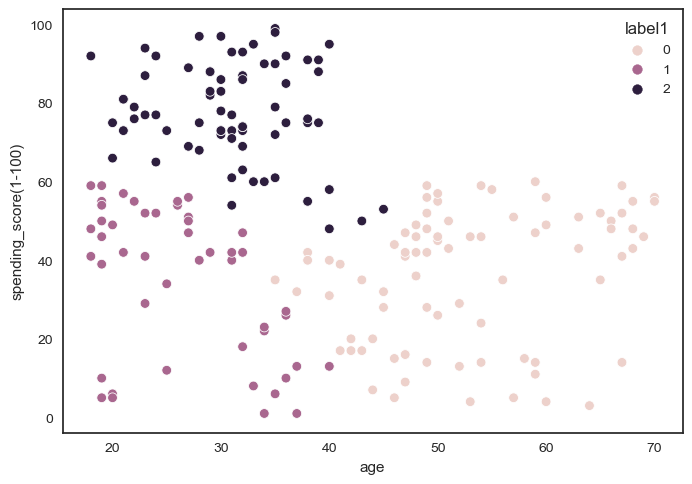

In [250]:
sns.scatterplot(data= df, x="age", y="spending_score(1-100)", hue="label1")
plt.show()

In [285]:
clus_pred1 = df.groupby("label1").mean().T
clus_pred1

label1,0,1,2
gender,0.433735,0.468085,0.428571
age,52.578313,26.382979,30.942857
annual_income(k$),58.204819,61.255319,62.885714
spending_score(1-100),35.638554,34.765957,77.828571
label2,1.951807,1.702128,1.742857


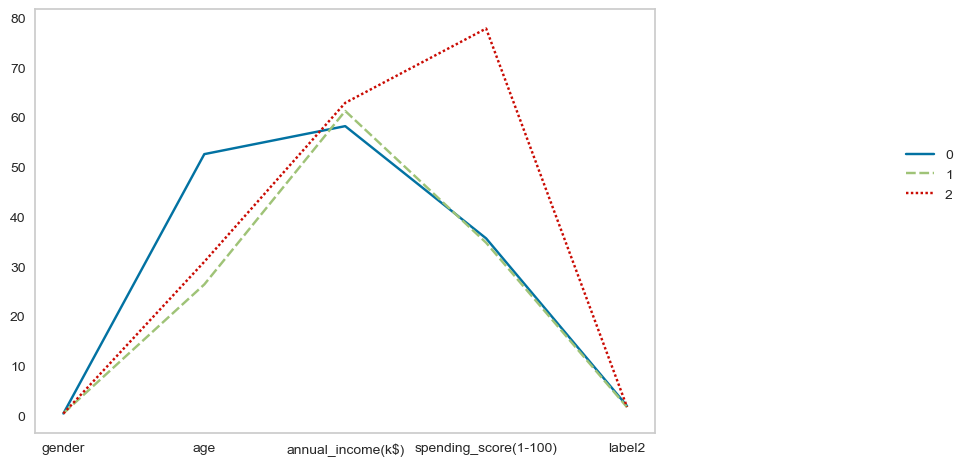

In [286]:
sns.lineplot(data = clus_pred1)
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.show()

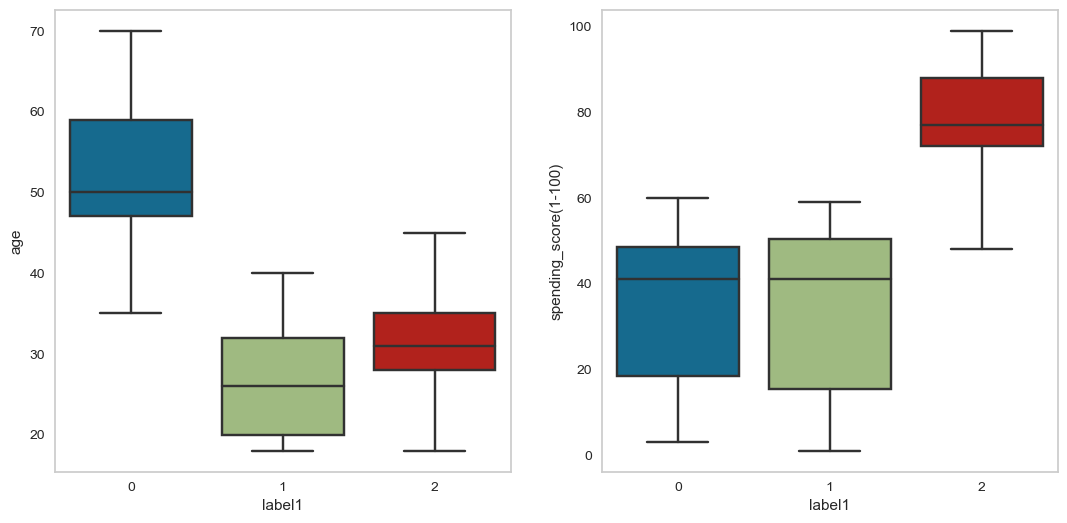

In [282]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "age", x = "label1", data = df)

plt.subplot(132)
sns.boxplot(y = "spending_score(1-100)", x = "label1", data = df)

# plt.subplot(133)
# sns.boxplot(y = "annual_income(k$)", x = "label1", data = df)
plt.show()

#### Annual Income and Spending Score- x2

In [268]:
df["label2"] = model2.labels_

In [269]:
df

,gender,age,annual_income(k$),spending_score(1-100),labels,label1,label2
CustomerID,,,,,,,
1,1,19,15,39,low_income_low_spent,1,4
2,1,21,15,81,low_income_high_spent,2,3
3,0,20,16,6,low_income_low_spent,1,4
4,0,23,16,77,low_income_high_spent,2,3
5,0,31,17,40,low_income_low_spent,1,4
...,...,...,...,...,...,...,...
196,0,35,120,79,high_income_high_spent,2,1
197,0,45,126,28,high_income_low_spent,0,0
198,1,32,126,74,high_income_high_spent,2,1


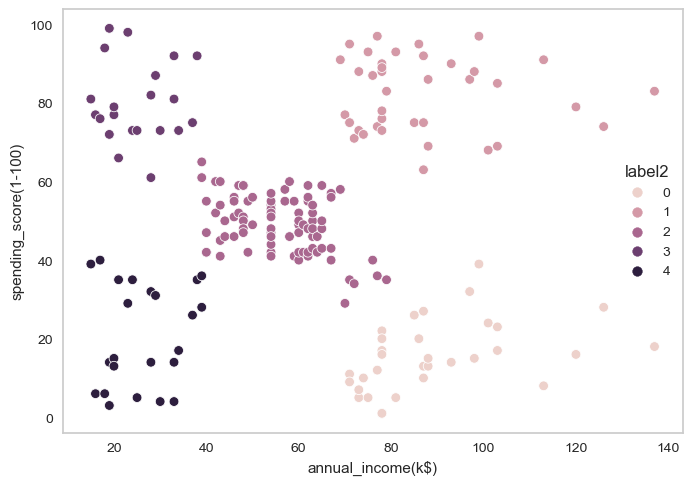

In [277]:
sns.scatterplot(data= df, x="annual_income(k$)", y="spending_score(1-100)", hue="label2")
plt.show()

In [274]:
clus_pred = df.groupby("label2").mean().T
clus_pred

label2,0,1,2,3,4
gender,0.56250,0.461538,0.400000,0.428571,0.391304
age,41.00000,32.692308,42.482353,25.333333,45.217391
annual_income(k$),89.40625,86.538462,55.811765,25.095238,26.304348
spending_score(1-100),15.59375,82.128205,49.129412,80.047619,20.913043
label1,0.40625,2.000000,0.564706,2.000000,0.260870


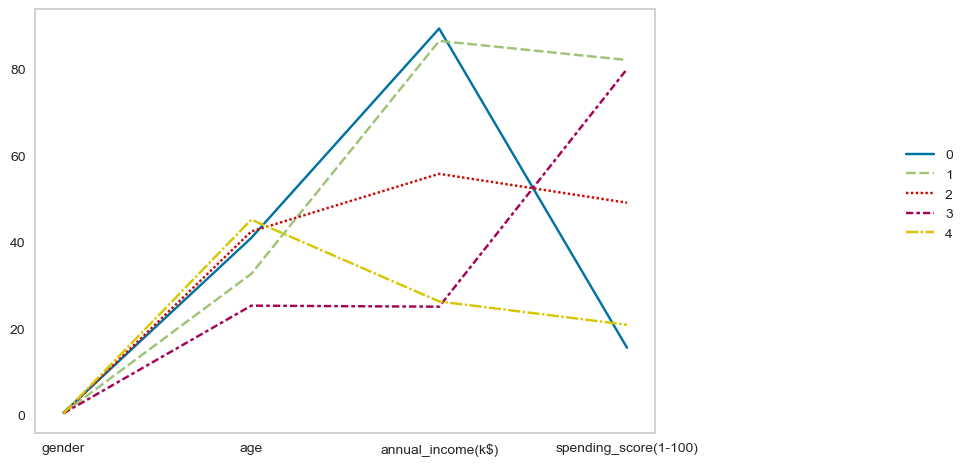

In [276]:
sns.lineplot(data = clus_pred.iloc[0:4,:])
plt.legend(bbox_to_anchor=(1.5, 0.7))
plt.show()

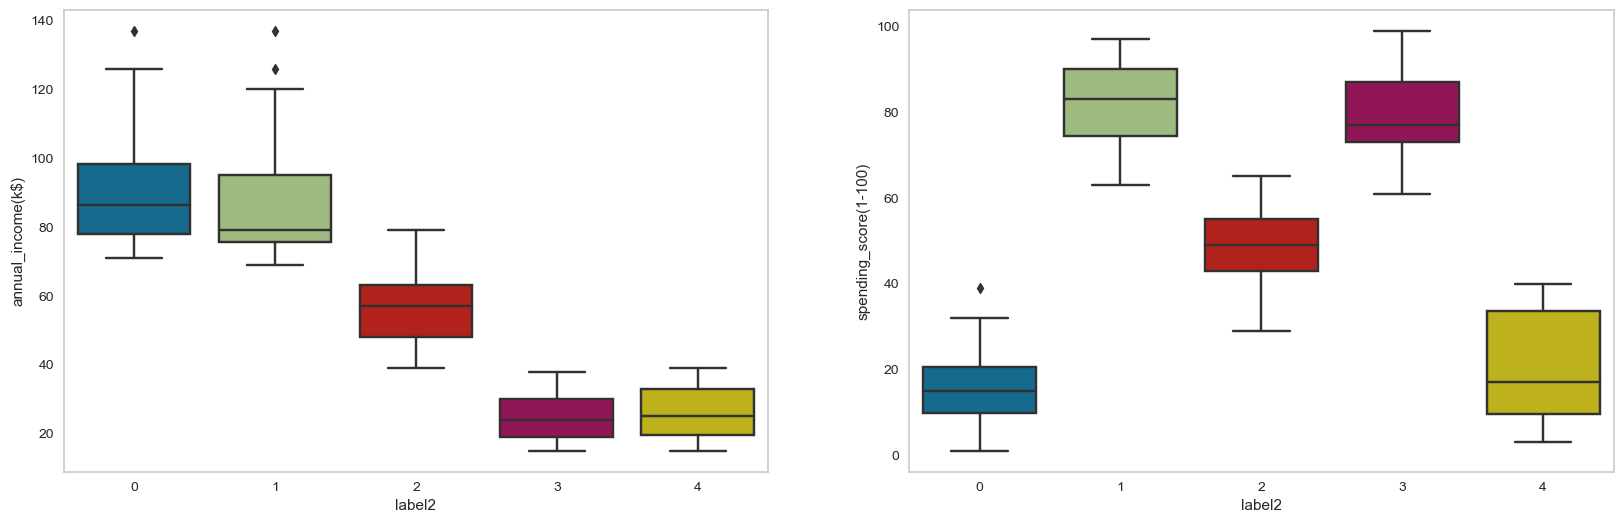

In [284]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y = "annual_income(k$)", x = "label2", data = df)

plt.subplot(122)
sns.boxplot(y = "spending_score(1-100)", x = "label2", data = df)
plt.show()

0 : high_income_low_spent
1 : high_income_high_spent
2 : medium_income_medium_spent
3 : low_income_high_spent
4 : low_income_low_spent

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___